# Langchain Demo

## Part I. Manual Steps

In [1]:
# This might take you a little bit of sorting packages! We use langchain-openai!
#!pip install -U langchain-core langchain langchain-openai

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
assert api_key, "❌ OPENAI_API_KEY not found in .env file!"

In [3]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [4]:
from langchain_core.prompts import PromptTemplate  # May already be imported
from langchain_core.runnables import RunnableSequence  # For chaining

# Define the prompt
prompt_func = PromptTemplate.from_template(
    "Write a Python function named `f(x)` that returns an uneven polynomial expression "
    "with coefficients chosen so that |f(x)| < 10 for x in [-10, 10]. "
    "Use numpy and return the result as python code only"
)

# Chain prompt and LLM
chain_func = prompt_func | llm

# Invoke the chain
code_func = chain_func.invoke({})

print("📄 Generated function:\n")
print(code_func)

📄 Generated function:

content='```python\nimport numpy as np\n\ndef f(x):\n    return 0.1 * x**3 - 0.5 * x + 2\n```' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 53, 'total_tokens': 88, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BVecTDUd6ILicxvmELY6zhnAhZNCu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--889165ad-bccb-4302-963f-96bd4da07462-0' usage_metadata={'input_tokens': 53, 'output_tokens': 35, 'total_tokens': 88, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [12]:
# Extract content and strip explanations if necessary
raw_content = code_func.content.strip()

# If it contains Markdown-style code fences, extract code block
if "```python" in raw_content:
    code_lines = raw_content.split("```python")[1].split("```")[0]
elif "```" in raw_content:
    code_lines = raw_content.split("```")[1]
else:
    code_lines = raw_content  # fallback: write as-is

# Save to file
with open("f_function.py", "w") as f:
    f.write(code_lines.strip())

import traceback

# Try executing the generated function
try:
    exec(open("f_function.py").read(), globals())  # defines f(x) globally
    print("✅ Function executed and loaded successfully.")
except Exception as e:
    print("❌ Error while executing the generated function:")
    print(traceback.format_exc())


✅ Function executed and loaded successfully.


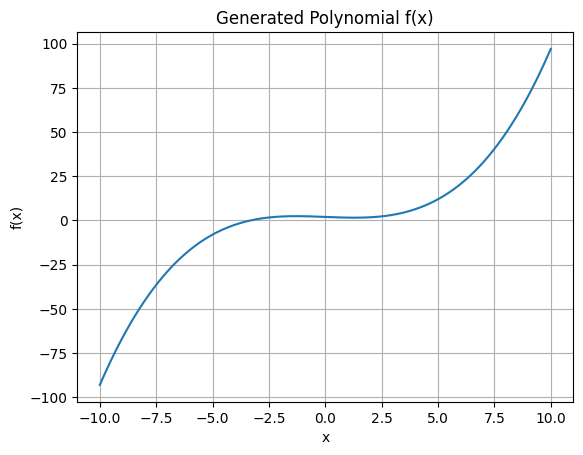

In [13]:
# test and plot the function
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
y = f(x)

plt.plot(x, y)
plt.title("Generated Polynomial f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In [17]:
from langchain.prompts import PromptTemplate
from IPython.display import display, Image
from langchain_openai import ChatOpenAI
import os
import traceback

# Initialize model (adjust if already done elsewhere)
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Prompt to generate a plotting script for f(x)
prompt_plot = PromptTemplate.from_template("""
Given a function f(x) which is defined and you can use — 
do not define f(x) again. Instead, 
write a Python script to plot f(x) over x in [-10, 10] using matplotlib.
Save the figure as 'plot.png'. Return python code only.
""")

# Generate response using the new LangChain syntax
response = (prompt_plot | llm).invoke({})

# Extract the content string from the AIMessage
raw_content2 = response.content.strip()

# Parse out code from markdown fences if needed
if "```python" in raw_content2:
    code_lines2 = raw_content2.split("```python")[1].split("```")[0]
elif "```" in raw_content2:
    code_lines2 = raw_content2.split("```")[1]
else:
    code_lines2 = raw_content2  # fallback

# Save code to file
with open("plot_function.py", "w") as f:
    f.write(code_lines2.strip())

# Try executing the generated plot code
try:
    # Load the function definition into the global scope
    exec(open("f_function.py").read(), globals())
    exec(open("plot_function.py").read(), globals())
    print("✅ Plot executed successfully.")
except Exception:
    print("❌ Error during execution:")
    print(traceback.format_exc())

✅ Plot executed successfully.


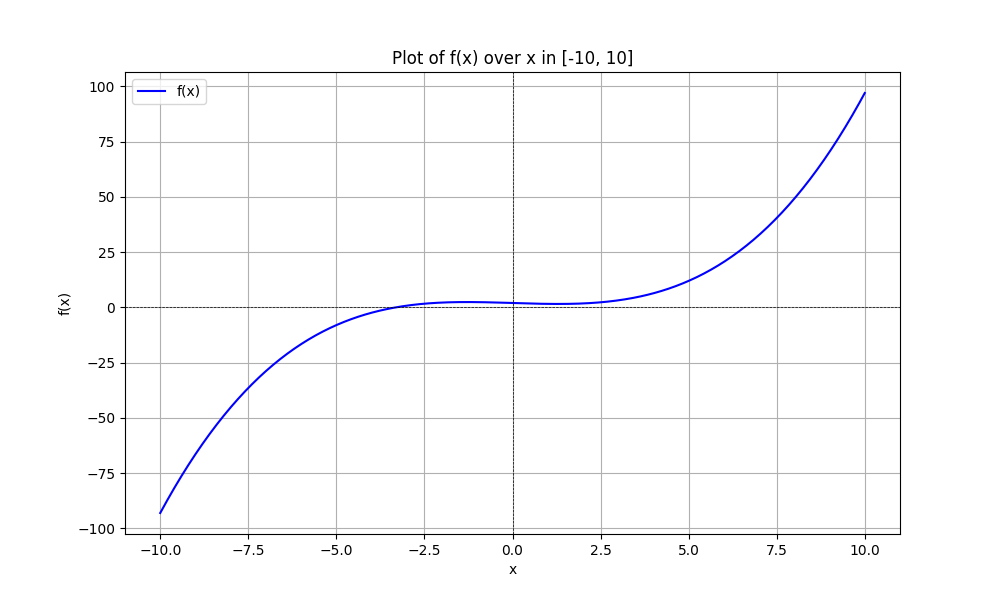

In [18]:
# Show the resulting image if it exists
if os.path.exists("plot.png"):
    display(Image(filename="plot.png", width=500))
else:
    print("❌ plot.png not found.")

In [19]:
prompt_summary = PromptTemplate.from_template(f"""
    Given the following Python function definition:\n\n{raw_content}\n\n
    Describe the mathematical properties of this function (degree, max, min, monotonicity).
""")

chain_summary = prompt_summary | llm
summary = chain_summary.invoke({"code": code_func.content})

from IPython.display import Markdown, display

# Print the function summary as Markdown
print("🧠 Function Summary:\n")
display(Markdown(summary.content))

🧠 Function Summary:



The function defined in the code is:

\[
f(x) = 0.1x^3 - 0.5x + 2
\]

### Mathematical Properties:

1. **Degree**:
   - The function is a polynomial of degree 3, as the highest power of \(x\) is 3.

2. **Maxima and Minima**:
   - To find the local maxima and minima, we need to compute the first derivative of the function and set it to zero:
     \[
     f'(x) = \frac{d}{dx}(0.1x^3 - 0.5x + 2) = 0.3x^2 - 0.5
     \]
   - Setting the first derivative to zero:
     \[
     0.3x^2 - 0.5 = 0 \implies 0.3x^2 = 0.5 \implies x^2 = \frac{0.5}{0.3} \implies x^2 = \frac{5}{3} \implies x = \pm \sqrt{\frac{5}{3}} \approx \pm 1.29
     \]
   - To determine whether these points are maxima or minima, we can compute the second derivative:
     \[
     f''(x) = \frac{d}{dx}(0.3x^2) = 0.6x
     \]
   - Evaluating the second derivative at the critical points:
     - For \(x = \sqrt{\frac{5}{3}}\):
       \[
       f''\left(\sqrt{\frac{5}{3}}\right) = 0.6\sqrt{\frac{5}{3}} > 0 \quad (\text{local minimum})
       \]
     - For \(x = -\sqrt{\frac{5}{3}}\):
       \[
       f''\left(-\sqrt{\frac{5}{3}}\right) = 0.6(-\sqrt{\frac{5}{3}}) < 0 \quad (\text{local maximum})
       \]

3. **Monotonicity**:
   - The function is increasing or decreasing based on the sign of the first derivative \(f'(x)\):
     - For \(x < -\sqrt{\frac{5}{3}}\), \(f'(x) < 0\) (decreasing).
     - For \(-\sqrt{\frac{5}{3}} < x < \sqrt{\frac{5}{3}}\), \(f'(x) > 0\) (increasing).
     - For \(x > \sqrt{\frac{5}{3}}\), \(f'(x) > 0\) (increasing).
   - Therefore, the function has a local maximum at \(x = -\sqrt{\frac{5}{3}}\) and a local minimum at \(x = \sqrt{\frac{5}{3}}\).

### Summary:
- **Degree**: 3
- **Local Maximum**: at \(x = -\sqrt{\frac{5}{3}}\)
- **Local Minimum**: at \(x = \sqrt{\frac{5}{3}}\)
- **Monotonicity**: Decreasing for \(x < -\sqrt{\frac{5}{3}}\), increasing for \(-\sqrt{\frac{5}{3}} < x < \sqrt{\frac{5}{3}}\), and increasing for \(x > \sqrt{\frac{5}{3}}\).

## Part II. Automatic Framework

In [20]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
import traceback, os
from IPython.display import Markdown, display

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Core function: runs LLM, saves & executes code, loops if error
def autonomous_code_agent(task_prompt, filename="generated.py", max_attempts=5):
    base_prompt = PromptTemplate.from_template("""
You are an expert Python coder. Write a full Python script to do the following task:

{task}

Make sure the output is a clean Python script with no markdown or explanations.
""")

    current_prompt = base_prompt.format(task=task_prompt)
    for attempt in range(1, max_attempts + 1):
        print(f"\n=== Attempt {attempt} ===")
        result = llm.invoke(current_prompt)
        code = result.content.strip()

        # Save to file
        with open(filename, "w") as f:
            f.write(code)

        # Show generated code
        display(Markdown(f"```python\n{code}\n```"))

        # Try execution
        try:
            exec_globals = {}
            exec(open(filename).read(), exec_globals)
            print("✅ Code executed successfully.")
            return True, code
        except Exception as e:
            tb = traceback.format_exc()
            print("❌ Execution failed. Trying again...\n")
            current_prompt += f"\n\nThe last script failed with this error:\n{tb}\n\nPlease fix it."

    print("❌ Failed after max attempts.")
    return False, None


=== Attempt 1 ===


```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the polynomial function
def polynomial_function(x, y):
    return x**2 + y**2  # Example: z = x^2 + y^2

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-6, 6, 100)
x, y = np.meshgrid(x, y)
z = polynomial_function(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Save the plot
plt.savefig('my2d.png')
plt.show()
```

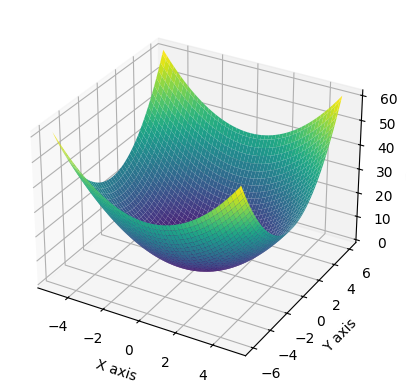

✅ Code executed successfully.


(True,
 "import numpy as np\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\n\n# Define the polynomial function\ndef polynomial_function(x, y):\n    return x**2 + y**2  # Example: z = x^2 + y^2\n\n# Create a grid of points\nx = np.linspace(-5, 5, 100)\ny = np.linspace(-6, 6, 100)\nx, y = np.meshgrid(x, y)\nz = polynomial_function(x, y)\n\n# Create a 3D plot\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nax.plot_surface(x, y, z, cmap='viridis')\n\n# Set labels\nax.set_xlabel('X axis')\nax.set_ylabel('Y axis')\nax.set_zlabel('Z axis')\n\n# Save the plot\nplt.savefig('my2d.png')\nplt.show()")

In [26]:
autonomous_code_agent("""
Create and make a 3d visualization of a 2d polynomial function on the area [-5,5]x[-6,6]. Save the plot as my2d.png
""")